In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data/purchase_data.csv")
df.head()

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
0,20/11/2018,37077,505,credit,49.53,12.0,8,NaN
1,20/11/2018,59173,509,paypal,50.61,25.9,8,NaN
2,20/11/2018,41066,507,credit,85.99,34.9,11,NaN
3,20/11/2018,50741,506,credit,34.60,16.5,9,NaN
4,20/11/2018,53639,515,paypal,266.27,43.1,30,NaN


In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    24999 non-null  object 
 1   customer_id             24999 non-null  int64  
 2   product_category        24999 non-null  int64  
 3   payment_method          24999 non-null  object 
 4   value [USD]             24999 non-null  float64
 5   time_on_site [Minutes]  24999 non-null  float64
 6   clicks_in_site          24999 non-null  int64  
 7   Unnamed: 7              0 non-null      float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.5+ MB


,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
count,24999,24999.000000,24999.000000,24999,24999.000000,24999.000000,24999.000000,0.0
unique,10,NaN,NaN,2,NaN,NaN,NaN,NaN
top,23/11/2018,NaN,NaN,credit,NaN,NaN,NaN,NaN
freq,7292,NaN,NaN,14459,NaN,NaN,NaN,NaN
mean,NaN,35047.126765,507.918797,NaN,203.248763,73.132649,16.039642,NaN
std,NaN,14448.792961,4.288552,NaN,208.015747,150.983919,13.396365,NaN
min,NaN,10000.000000,501.000000,NaN,0.000000,2.000000,0.000000,NaN
25%,NaN,22500.000000,504.000000,NaN,57.170000,13.300000,8.000000,NaN
50%,NaN,35184.000000,508.000000,NaN,136.720000,24.100000,11.000000,NaN
75%,NaN,47468.000000,512.000000,NaN,278.815000,43.000000,19.000000,NaN


In [5]:
# 🧹 Renombrar columnas a español y limpiar nombres
df = df.rename(columns={
    'date': 'fecha',
    'customer_id': 'id_cliente',
    'product_category': 'categoria_producto',
    'payment_method': 'metodo_pago',
    'value [USD]': 'valor_usd',
    'time_on_site [Minutes]': 'tiempo_en_sitio',
    'clicks_in_site': 'clics_en_sitio'
})

# 🧽 Eliminar columna sin nombre si existe
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 📌 Confirmar cambios
df.head()


,fecha,id_cliente,categoria_producto,metodo_pago,valor_usd,tiempo_en_sitio,clics_en_sitio
0,20/11/2018,37077,505,credit,49.53,12.0,8
1,20/11/2018,59173,509,paypal,50.61,25.9,8
2,20/11/2018,41066,507,credit,85.99,34.9,11
3,20/11/2018,50741,506,credit,34.60,16.5,9
4,20/11/2018,53639,515,paypal,266.27,43.1,30


In [7]:
# Verificar valores nulos
df.isnull().sum()

# Convertir fecha a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               24999 non-null  datetime64[ns]
 1   id_cliente          24999 non-null  int64         
 2   categoria_producto  24999 non-null  int64         
 3   metodo_pago         24999 non-null  object        
 4   valor_usd           24999 non-null  float64       
 5   tiempo_en_sitio     24999 non-null  float64       
 6   clics_en_sitio      24999 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 1.3+ MB


In [9]:
#Promedio y total de ventas
print("promedio de valor por compra(USD):",df['valor_usd'].mean())
print("Total de ventas (USD):",df['valor_usd'].sum())

promedio de valor por compra(USD): 203.24876315052603
Total de ventas (USD): 5081015.83


C:\Users\HP\AppData\Local\Temp\ipykernel_7532\2064529746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['metodo_pago'].value_counts().index,


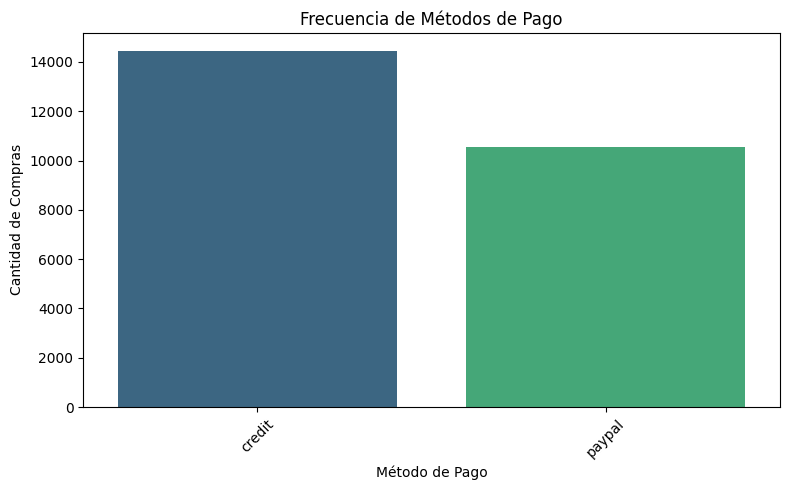

In [11]:
#ventas por metodo de pago
plt.figure(figsize=(8,5))
sns.barplot(x=df['metodo_pago'].value_counts().index,
           y=df['metodo_pago'].value_counts().values,
            palette='viridis')
plt.title("Frecuencia de Métodos de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

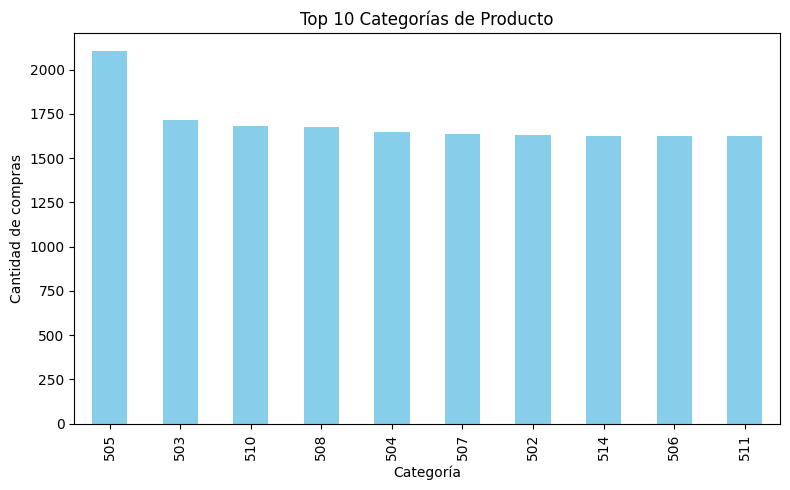

In [14]:
# Productos mas comprados
productos = df['categoria_producto'].value_counts().head(10)

plt.figure(figsize=(8,5))
productos.plot(kind='bar', color='skyblue')
plt.title("Top 10 Categorías de Producto")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de compras")
plt.tight_layout()
plt.show()



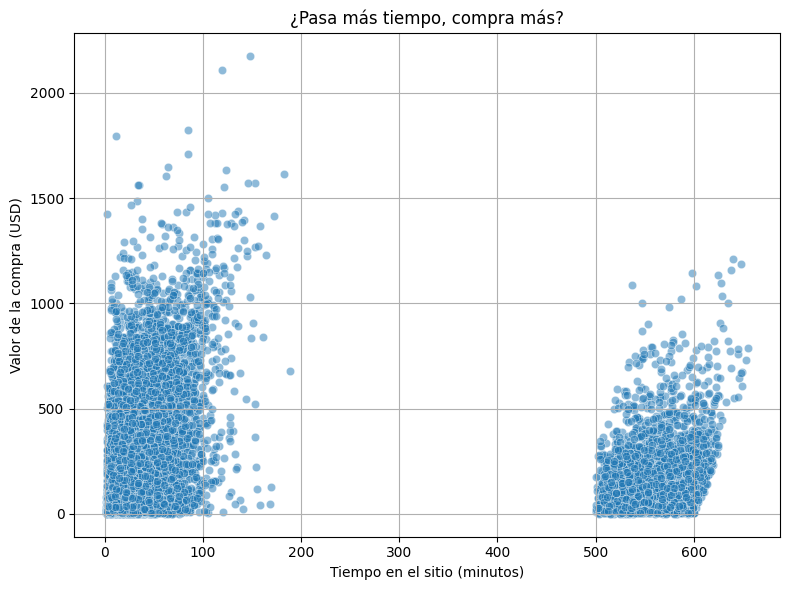

In [16]:
#Relación entre tiempo en el sitio y valor de compra
plt.figure(figsize=(8,6))
sns.scatterplot(x='tiempo_en_sitio', y='valor_usd', data=df, alpha=0.5)
plt.title("¿Pasa más tiempo, compra más?")
plt.xlabel("Tiempo en el sitio (minutos)")
plt.ylabel("Valor de la compra (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()
